In [1]:
from AoE2ScenarioParser.datasets.players import PlayerId
from AoE2ScenarioParser.datasets.units import UnitInfo
from AoE2ScenarioParser.datasets.buildings import BuildingInfo
from AoE2ScenarioParser.datasets.other import OtherInfo
from visualizer.visualizer import visualize_map, visualize_mat
from scenario.scenario import write_units, write_map, make_scenario, save_file, write_multiple, write_terrain
from units.placers.buildingplacer import place_groups, place_all, add_borders
from units.wallgenerators.voronoi import generate_voronoi_walls
from AoE2ScenarioParser.datasets.terrains import TerrainId
from map.map import map

In [2]:
input_name = "Basic_Py.aoe2scenario"
output_name = "BASIC_SCENARIO.aoe2scenario"

In [3]:
Map = map(256)
Map.object_array = generate_voronoi_walls(256,25)
Map.object_dict = Map.create_set(Map.object_array)
a=1

In [4]:
for i in range(-500,0):
    add_borders(Map, array_space_type = i, border_type = TerrainId.ROAD_FUNGUS, border_margin = 1)

In [5]:
for i in range(-500,0):
    place_groups(Map, array_space_type=i, obj_type = OtherInfo.TREE_OAK_FOREST, obj_size = 1, group_size = 5, groups=25, clumping = 3)
    place_groups(Map, array_space_type=i, obj_type = OtherInfo.TREE_OAK_FOREST, obj_size = 1, group_size = 25, groups=5, clumping = 5)


    place_all(Map, array_space_type = i, obj_type = BuildingInfo.BARRACKS, obj_size = 3, margin = 0, total = 3)
    place_all(Map, array_space_type = i, obj_type = BuildingInfo.ARCHERY_RANGE, obj_size = 3, margin = 0, total = 3)
    place_all(Map, array_space_type = i, obj_type = BuildingInfo.STABLE, obj_size = 3, margin = 0, total = 3)
    place_all(Map, array_space_type = i, obj_type = BuildingInfo.CASTLE, obj_size = 4, margin = 0, total = 2)


    place_groups(Map, array_space_type=i, obj_type = BuildingInfo.HOUSE, obj_size = 2, group_size = 5, groups=1, clumping = 10)


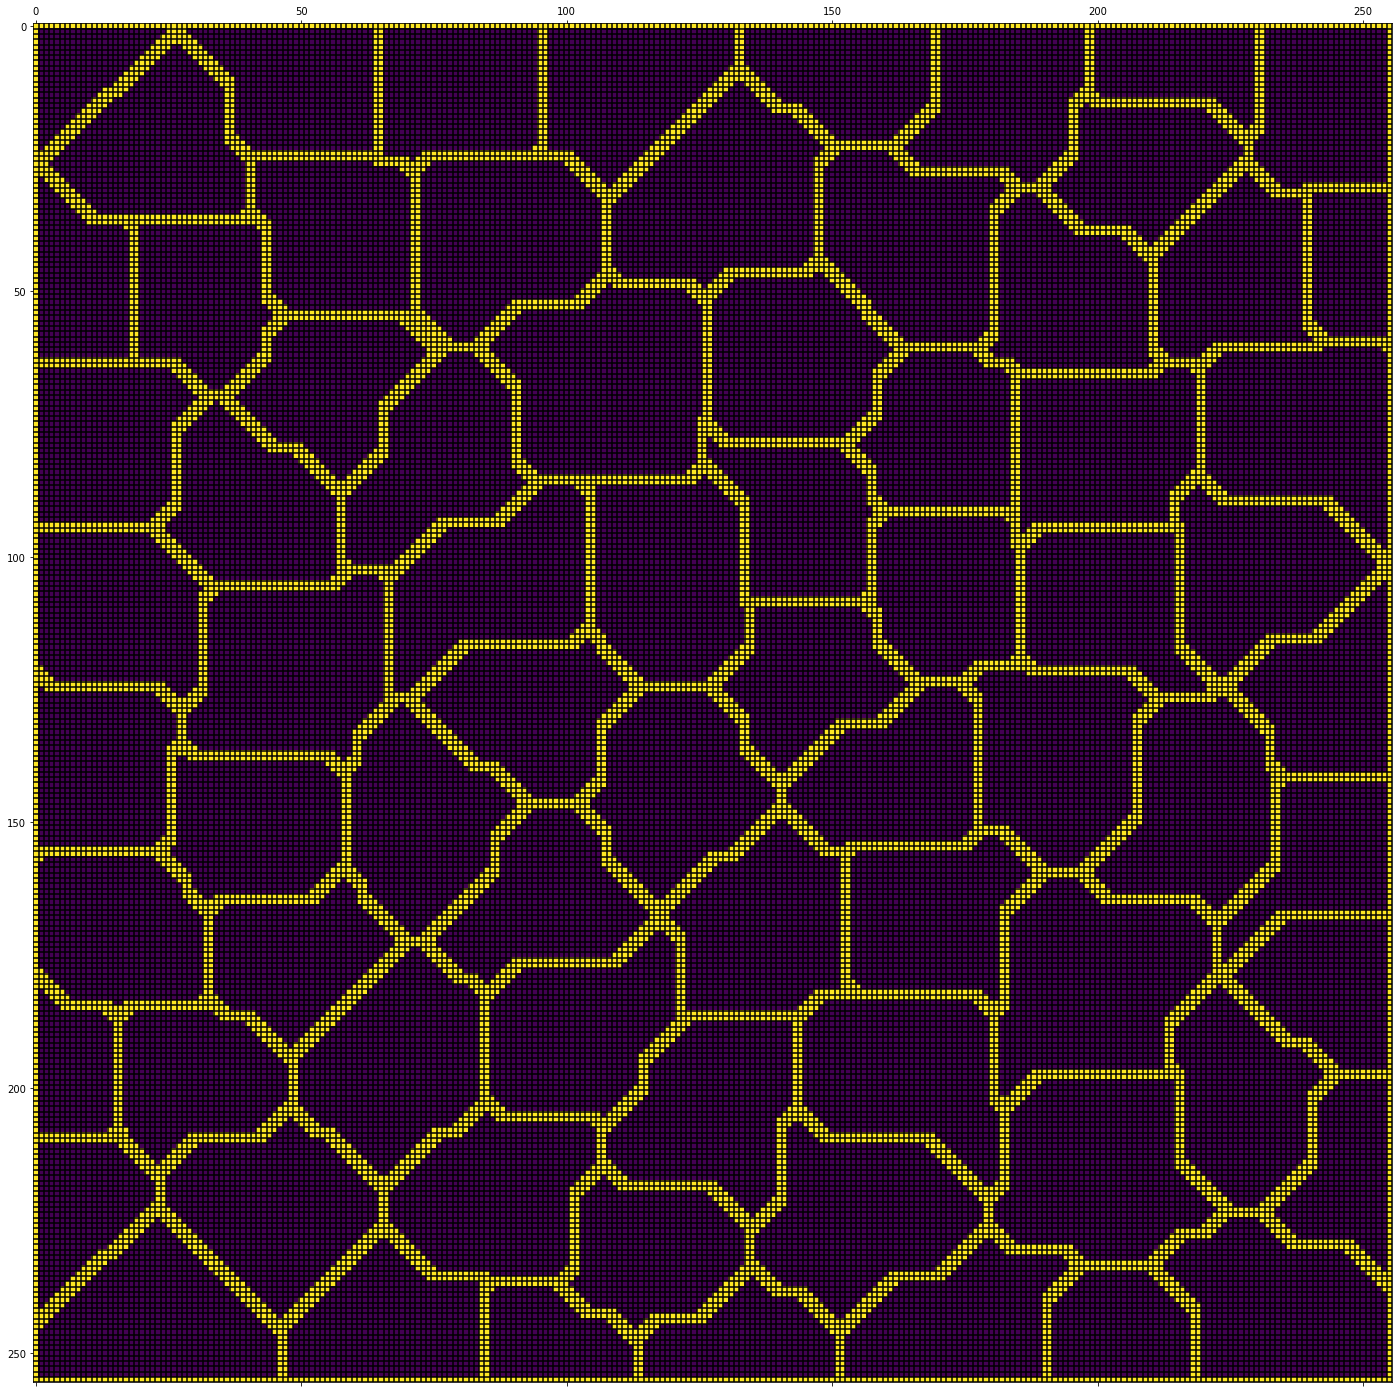

In [6]:
visualize_mat(Map.terrain_array)

{0, <BuildingInfo.ARCHERY_RANGE: (87, 0, 1415, 16128, False)>, <TerrainId.ROAD_FUNGUS: 75>, <BuildingInfo.BARRACKS: (12, 2, 1402, 16135, False)>, -10, <BuildingInfo.STABLE: (101, 23, 1417, 16171, False)>, <BuildingInfo.HOUSE: (70, 34, 1403, 16344, False)>, <OtherInfo.TREE_OAK_FOREST: (411, 32, 415, 16277, True)>, -75, -74, -73, -72, -71, -70, -69, -68, <BuildingInfo.CASTLE: (82, 7, 1430, 16142, False)>, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -53, -54, -52, -50, -49, -48, -51, -47, -46, -45, -44, -42, -43, -41, -40, -39, -38, -37, -36, -35, -34, -32, -33, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -9, -8, -7, -6, -5, -4, -3, -1, -2}


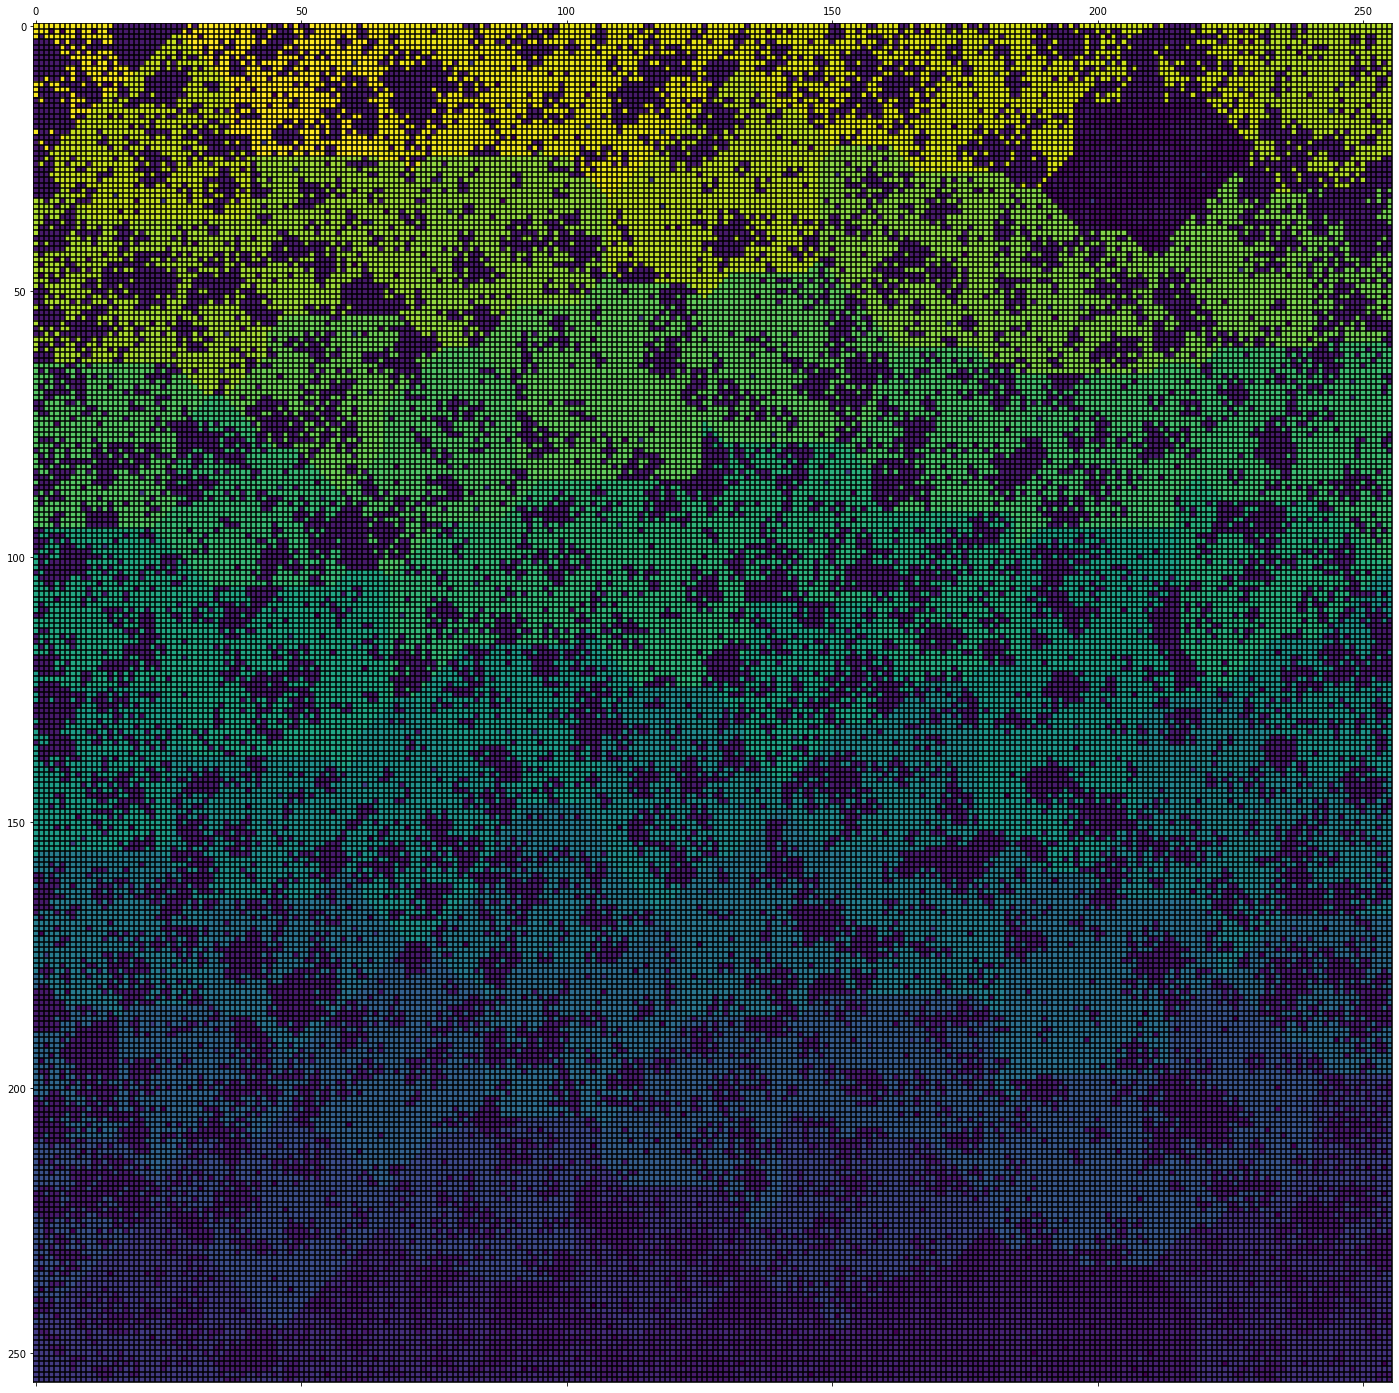

In [7]:
visualize_map(Map)

In [7]:
scenario = make_scenario(input_name)
write_map(scenario, 256)
write_multiple(scenario, Map, PlayerId.ONE)


Reading file: 'C:\Users\josep\Games\Age of Empires 2 DE\76561198242754748\resources\_common\scenario\Basic_Py.aoe2scenario'
Reading scenario file finished successfully.

############### Attributes ###############
>>> Game version: 'DE'
>>> Scenario version: 1.46
##########################################

Loading scenario structure finished successfully.
Parsing scenario file...
	✔ FileHeadereHeader data...
	✔ DataHeaderaHeader data...
	✔ Messagesessages data...
	✔ Cinematicsematics data...
	✔ BackgroundImagendImage data...
	✔ PlayerDataTwoDataTwo data...
	✔ GlobalVictoryVictory data...
	✔ Diplomacyplomacy data...
	✔ OptionsOptions data...
	✔ Maping Map data...
	✔ Unitsg Units data...
	✔ Triggersriggers data...
	✔ Filesg Files data...
Parsing scenario file finished successfully.

Setting up managers ...
	✔ PlayerManagerrManager...
	✔ MapManagerpManager...
	✔ UnitManagertManager...
	✔ TriggerManagerrManager...
	✔ XsManagersManager...
Setting up managers finished successfully.


In [8]:
place_groups(Map, array_space_type=TerrainId.ROAD_FUNGUS, obj_type = UnitInfo.LEGIONARY, obj_size = 1, group_size = 30, groups=20, clumping = 5)
write_units(scenario, Map.object_dict[UnitInfo.LEGIONARY], UnitInfo.LEGIONARY, 1)

In [9]:
save_file(scenario, output_name)


Reconstructing sections and structs from managers...
	✔ PlayerManagerlayerManager...
	✔ MapManagerg MapManager...
	✔ UnitManager UnitManager...
	✔ TriggerManageriggerManager...
	✔ XsManagerng XsManager...
Reconstruction finished successfully.

File writing from structure started...
	✔ FileHeaderg FileHeader...
	✔ DataHeaderg DataHeader...
	✔ Messagesing Messages...
	✔ Cinematicsg Cinematics...
	✔ BackgroundImagekgroundImage...
	✔ PlayerDataTwolayerDataTwo...
	✔ GlobalVictorylobalVictory...
	✔ Diplomacyng Diplomacy...
	✔ Optionsting Options...
	✔ Maptructing Map...
	✔ Unitsucting Units...
	✔ Triggersing Triggers...
	✔ Filesucting Files...
File writing finished successfully.
File successfully written to: 'C:\Users\josep\Games\Age of Empires 2 DE\76561198242754748\resources\_common\scenario\BASIC_DICK.aoe2scenario'
